In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
dataset_obuka = pd.read_csv('https://raw.githubusercontent.com/mvikic/speaker-gender-recognition/master/baza_neutral.csv')
dataset_obuka.head()

,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,class,age,gender
0,'norm_2_1_0_mvmd01n__01-03-21-09-30-10-0006.wav',0.034224,0.000683,0.033541,228.0,58.0,0.007787,-0.000022,0.010811,0.000037,...,0.000000e+00,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,p0006,42.0,M
1,'norm_2_1_0_mvmd01n__01-03-21-10-34-50-0005.wav',0.094245,0.000659,0.093586,223.0,186.0,0.014003,-0.000015,0.016184,0.000218,...,-4.427129e-08,-0.008472,1.211509,511.0406,22.61710,-0.078434,4.071894,p0005,37.0,F
2,'norm_2_1_0_mvmd01n__02-04-21-03-29-27-1007.wav',0.135660,0.000529,0.135131,66.0,231.0,0.016401,-0.000019,0.019596,0.000440,...,2.855338e-08,-0.002568,0.443014,317.8704,17.83077,0.140027,5.672993,p1007,35.0,F
3,'norm_2_1_0_mvmd01n__03-04-21-09-55-29-1008.wav',0.045491,0.000202,0.045289,79.0,339.0,0.008490,-0.000027,0.013327,0.000050,...,5.248369e-08,-0.007947,1.410540,404.5609,20.13027,-0.003891,4.712767,p1008,39.0,F
4,'norm_2_1_0_mvmd01n__03-04-21-11-38-46-1009.wav',0.092675,0.001377,0.091298,218.0,67.0,0.011916,0.000016,0.009727,0.000196,...,-7.889488e-08,-0.005969,0.817719,320.4470,17.90730,0.139588,7.677752,p1009,24.0,F


In [3]:
classes = dataset_obuka.iloc[:,-3]
print(classes.unique())

classes_svi = classes.unique()
print(classes_svi)

classes_izbaci = ['p0006', 'p0005', 'p0001', 'p0002', 'p1007', 'p1008', 'p1009', 'p1060', 'p1010', 'p1011', 'p1012'] #test podaci, nasumicno odabrani
classes_ostavi = [i for i in classes_svi if i not in classes_izbaci]

print(classes_ostavi)
print(len(classes_ostavi))

['p0006' 'p0005' 'p1007' 'p1008' 'p1009' 'p1060' 'p1010' 'p1011' 'p1012'
 'p1061' 'p1013' 'p1014' 'p1015' 'p1016' 'p1017' 'p1019' 'p1049' 'p1003'
 'p1024' 'p1023' 'p1020' 'p1021' 'p1062' 'p1026' 'p1027' 'p1028' 'p1025'
 'p1030' 'p1031' 'p1032' 'p1033' 'p1034' 'p1036' 'p1004' 'p1037' 'p1038'
 'p1039' 'p1040' 'p1043' 'p1045' 'p1044' 'p1005' 'p1046' 'p1050' 'p1051'
 'p1047' 'p1052' 'p1053' 'p1054' 'p0001' 'p0002' 'p0003' 'p1057' 'p1058'
 'p1006']
['p0006' 'p0005' 'p1007' 'p1008' 'p1009' 'p1060' 'p1010' 'p1011' 'p1012'
 'p1061' 'p1013' 'p1014' 'p1015' 'p1016' 'p1017' 'p1019' 'p1049' 'p1003'
 'p1024' 'p1023' 'p1020' 'p1021' 'p1062' 'p1026' 'p1027' 'p1028' 'p1025'
 'p1030' 'p1031' 'p1032' 'p1033' 'p1034' 'p1036' 'p1004' 'p1037' 'p1038'
 'p1039' 'p1040' 'p1043' 'p1045' 'p1044' 'p1005' 'p1046' 'p1050' 'p1051'
 'p1047' 'p1052' 'p1053' 'p1054' 'p0001' 'p0002' 'p0003' 'p1057' 'p1058'
 'p1006']
['p1061', 'p1013', 'p1014', 'p1015', 'p1016', 'p1017', 'p1019', 'p1049', 'p1003', 'p1024', 'p1023', 'p10

In [4]:
dataset_train = dataset_obuka.drop(['name', 'age'], axis = 1)
# print(dataset_train.head())
print(id(dataset_train), id(dataset_obuka))
print(dataset_train.shape)

2317124866160 2316565319488
(3372, 386)


In [5]:
#print(id(dataset_bezImena_train), id(dataset_bezImena))

# for i in range(0, len(classes_izbaci)):   
#     indexes_izb = dataset_train.loc[dataset_train['class'].str.find(classes_izbaci[i]) != -1].index 
#     dataset_train.drop(indexes_izb, axis = 0, inplace = True)

for uzorak_id in classes_izbaci:
    indexes_izb = dataset_train.loc[dataset_train['class'] == uzorak_id].index
    dataset_train.drop(indexes_izb, axis = 0, inplace = True)

print(dataset_train.shape)

(2698, 386)


In [6]:
dataset_train = dataset_train.drop(['class'], axis = 1)
dataset_train.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,...,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,gender
9,0.045257,0.000663,0.044594,264.0,235.0,0.009034,-7.162853e-06,0.010248,0.000050,0.007139,...,292.0,297.0,2.223122e-08,-0.002830,0.479608,452.6516,21.27742,-0.260020,8.177298,M
10,0.046709,0.001581,0.045128,204.0,108.0,0.008425,-5.279543e-06,0.009117,0.000041,0.006414,...,67.0,71.0,-2.334085e-01,-0.002348,0.074228,266.3562,16.32140,-0.098050,4.654404,M
11,0.055089,0.002300,0.052789,239.0,308.0,0.012595,-2.550780e-06,0.012996,0.000092,0.009577,...,12.0,8.0,3.765372e-08,-0.014929,2.351347,669.1466,25.90369,0.322016,4.528131,F
12,0.097138,0.000744,0.096394,254.0,183.0,0.018565,1.666536e-07,0.018543,0.000338,0.018373,...,6.0,127.0,-1.396640e-08,-0.014510,1.958808,595.7395,24.43416,0.125773,4.279946,F
13,0.074954,0.001254,0.073700,62.0,135.0,0.011308,-2.821091e-05,0.015159,0.000114,0.010902,...,204.0,207.0,0.000000e+00,-0.001518,0.207252,339.5236,18.42656,-0.002863,16.960740,M


In [7]:
X_obuka= dataset_train.iloc[:, :-1]
y_obuka = dataset_train.iloc[:, -1]

X_obuka.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,...,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis
9,0.045257,0.000663,0.044594,264.0,235.0,0.009034,-7.162853e-06,0.010248,0.000050,0.007139,...,186.0245,292.0,297.0,2.223122e-08,-0.002830,0.479608,452.6516,21.27742,-0.260020,8.177298
10,0.046709,0.001581,0.045128,204.0,108.0,0.008425,-5.279543e-06,0.009117,0.000041,0.006414,...,102.2652,67.0,71.0,-2.334085e-01,-0.002348,0.074228,266.3562,16.32140,-0.098050,4.654404
11,0.055089,0.002300,0.052789,239.0,308.0,0.012595,-2.550780e-06,0.012996,0.000092,0.009577,...,151.7801,12.0,8.0,3.765372e-08,-0.014929,2.351347,669.1466,25.90369,0.322016,4.528131
12,0.097138,0.000744,0.096394,254.0,183.0,0.018565,1.666536e-07,0.018543,0.000338,0.018373,...,134.4832,6.0,127.0,-1.396640e-08,-0.014510,1.958808,595.7395,24.43416,0.125773,4.279946
13,0.074954,0.001254,0.073700,62.0,135.0,0.011308,-2.821091e-05,0.015159,0.000114,0.010902,...,183.3595,204.0,207.0,0.000000e+00,-0.001518,0.207252,339.5236,18.42656,-0.002863,16.960740


In [8]:
#Zenski i muski

print('Nedostajućih vrijednosti ima: ', X_obuka.isnull().sum().sum())
print(f'Oznake klasa su: {y_obuka.unique()}')
pd.set_option('display.max_columns', None)
dataset_train.describe()

Nedostajućih vrijednosti ima:  0
Oznake klasa su: ['M' 'F']


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [9]:
#Muski uzorci
male = dataset_train[dataset_train['gender'] == 'M']
#male_sum = sum(dataset_train['gender'] == 'M')
male_sum = male.shape[0]
print(f'Klasi MALE pripada: {male_sum} uzoraka')
pd.set_option('display.max_columns', None)
male.describe()

Klasi MALE pripada: 1398 uzoraka


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [10]:
#Zenski uzorci
female = dataset_train[dataset_train['gender'] == 'F']
female_sum = female.shape[0]
print(f'Klasi FEMALE: {female_sum} uzoraka')
pd.set_option('display.max_columns', None)
female.describe()

Klasi FEMALE: 1300 uzoraka


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
"""from sklearn.model_selection import GridSearchCV
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15,20], 'class_weight':(None, 'balanced')}
dt = DecisionTreeClassifier()
clf=GridSearchCV(dt, parameters,cv=kf)
clf.fit(X_std, y_obuka)
print(clf.best_score_)
print(clf.best_params_)"""

In [ ]:
# #ODABIR PARAMETARA ZA DECISION TREE METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU - FOR PETLJA
labels_y = ['M', 'F']
s = StandardScaler()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
iteracija = 0 
for c in ['gini', 'entropy']:
     for m in [5,10,15,20,35]:
         for w in [None,'balanced']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                iteracija += 1
                pd.set_option('display.max_rows', None)
                classifier = DecisionTreeClassifier(class_weight=w,criterion=c,max_depth=m)  
                X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                X_std_test = s.transform(X_obuka.iloc[test_index,:])
                classifier.fit(X_std1, y_obuka.iloc[train_index])
                y_pred = classifier.predict(X_std_test)
                acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print(int(iteracija/10))
            print('za parametre c=', c, ' i m=', m, 'weigth je:',w,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

In [11]:
dataset_obuka

,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag

In [28]:
dataset_test = dataset_obuka.drop(['name', 'age'], axis = 1)

In [ ]:
# dataset_test['class'].unique().size

55

In [27]:
for uzorak_id in classes_ostavi:    
    indexes_ost = dataset_test.loc[dataset_test['class'] == uzorak_id].index
    dataset_test.drop(indexes_ost, axis = 0, inplace = True)

print(dataset_test.shape)
dataset_test.head()

(674, 386)


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [37]:
dataset_test = dataset_test.drop(['class'], axis = 1)
dataset_test.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [38]:
def evaluation_classif(conf_mat):
    TP = conf_mat[1,1]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    TN = conf_mat[0,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print(f'{precision=}')
    print(f'{accuracy=}')
    print(f'{sensitivity=}')
    print(f'{specificity=}')
    print(f'{F_score=}')

In [40]:
X_test= dataset_test.iloc[:, :-1]
y_test = dataset_test.iloc[:, -1]

print(X_test.shape)
X_test.head()

(3372, 384)


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [42]:
labels_y = ['M', 'F']
conf_mat_dt = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()

X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.fit_transform(X_test)


classifier_kon = DecisionTreeClassifier(class_weight=None,criterion='entropy',max_depth=35) 
classifier_kon.fit(X_obuka_std, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_std) 

conf_mat_dt = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(conf_mat_dt)

evaluation_classif(conf_mat_dt)

[[1549   33]
 [ 130 1660]]
precision=0.980507974010632
accuracy=0.9516607354685647
sensitivity=0.9273743016759777
specificity=0.9791403286978508
F_score=0.9532012632787826


Redukovani prostor ima dimenziju: 384


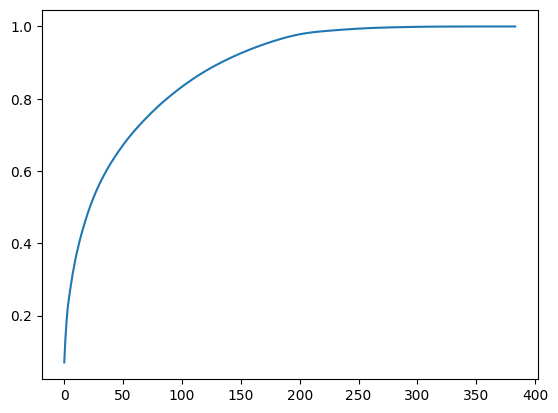

In [43]:
#PCA
pca = PCA(n_components=None)
pca.fit(X_obuka_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
X_obuka_pca = pca.transform(X_obuka_std)
X_test_pca = pca.transform(X_test_std)
pca_dimenzije = pca.n_components_
print(f'Redukovani prostor ima dimenziju: {pca_dimenzije}')

In [44]:
#PCA
labels_y = ['M', 'F']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
iteracija = 0 
for c in ['gini', 'entropy']:
     for m in [5,10,15,20,35]:
         for w in [None,'balanced']:
            for p in [125,150,175,200]:
                indexes = kf.split(X_obuka, y_obuka)
                acc_tmp = []
                fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
                for train_index, test_index in indexes:
                        iteracija += 1
                        X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                        X_std_test = s.transform(X_obuka.iloc[test_index,:])
                        pca = PCA(n_components=p)
                        pca.fit(X_std1)
                        X_train_r = pca.transform(X_std1)
                        X_test_r=pca.transform(X_std_test)
                        classifier = DecisionTreeClassifier(class_weight=w,criterion=c,max_depth=m)
                        classifier.fit(X_train_r, y_obuka.iloc[train_index])
                        y_pred = classifier.predict(X_test_r)
                        acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                        fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
                print(int(iteracija/10))
                print('za parametre n_components=',p, ' c=', c, ' i m=', m, 'weigth je:',w,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
                print(fin_conf_mat)
                acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

1
za parametre n_components= 125  c= gini  i m= 5 weigth je: None  tacnost je:  0.8991931708660335  a mat. konf. je:
[[1281.  117.]
 [ 155. 1145.]]
2
za parametre n_components= 150  c= gini  i m= 5 weigth je: None  tacnost je:  0.8977034283353987  a mat. konf. je:
[[1272.  126.]
 [ 150. 1150.]]
3
za parametre n_components= 175  c= gini  i m= 5 weigth je: None  tacnost je:  0.9010422690348342  a mat. konf. je:
[[1277.  121.]
 [ 146. 1154.]]
4
za parametre n_components= 200  c= gini  i m= 5 weigth je: None  tacnost je:  0.8999297810821973  a mat. konf. je:
[[1277.  121.]
 [ 149. 1151.]]
5
za parametre n_components= 125  c= gini  i m= 5 weigth je: balanced  tacnost je:  0.9036389921520034  a mat. konf. je:
[[1279.  119.]
 [ 141. 1159.]]
6
za parametre n_components= 150  c= gini  i m= 5 weigth je: balanced  tacnost je:  0.9014098857221533  a mat. konf. je:
[[1278.  120.]
 [ 146. 1154.]]
7
za parametre n_components= 175  c= gini  i m= 5 weigth je: balanced  tacnost je:  0.8988145394465097  

In [45]:
labels_y = ['M', 'F']
pca_conf_mat_dt = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()
#s.fit(X_obuka)
X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.fit_transform(X_test)

pca = PCA(n_components=200)
pca.fit(X_obuka_std)
X_obuka_PCA = pca.transform(X_obuka_std)
X_test_PCA = pca.transform(X_test_std)


classifier_kon = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=15)
classifier_kon.fit(X_obuka_PCA, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_PCA) 

pca_conf_mat_dt = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(pca_conf_mat_dt)

evaluation_classif(pca_conf_mat_dt)

[[1553   29]
 [ 148 1642]]
precision=0.9826451226810293
accuracy=0.947508896797153
sensitivity=0.9173184357541899
specificity=0.9816687737041719
F_score=0.9488587113550996


In [46]:
#LDA
labels_y = ['M', 'F']
lda_conf_mat_dt = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()
#s.fit(X_obuka)
X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_obuka_std, y_obuka)
X_obuka_LDA = lda.transform(X_obuka_std)
X_test_LDA = lda.transform(X_test_std)

classifier_kon = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=15)
classifier_kon.fit(X_obuka_LDA, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_LDA) 

lda_conf_mat_dt = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(lda_conf_mat_dt)

evaluation_classif(lda_conf_mat_dt)

[[1565   17]
 [  33 1757]]
precision=0.9904171364148816
accuracy=0.9851720047449585
sensitivity=0.9815642458100559
specificity=0.9892541087231352
F_score=0.9859708193041526
